# LinkedList - DoublyLinkedList

The doubly linked list is a singly linked list, except you may traverse forwards and backwards. The nodes point forward and backwards.

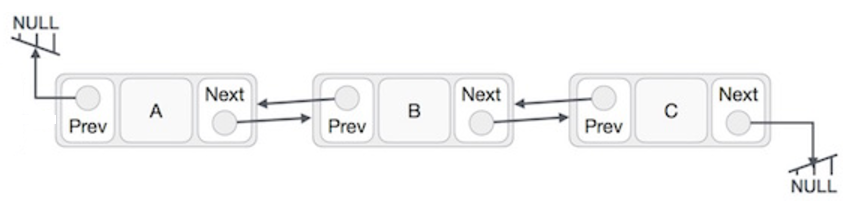

In [1]:
from IPython.display import Image

Image("images/doubly.png")

Before we begin coding the doubly linked list, we must make modifications to our Node class in order to account for this new previous pointer. In Node, I added a $prev$ pointer, and accounted for it in my constructor.

In [ ]:
public class Node  {
    private int data;
    private Node next;
    private Node prev;
    public Node()
    {

    }

    public Node(int item)
    {
        this.data = item;
        this.next = null;
        this.prev = null;
    }

Next is to make the setters and getters for the $prev$ field.

In [ ]:
public boolean setPrev(Node next)
{
    this.prev = next;
    return true;
}

public Node getPrev()
{
    return this.prev;
}

With those modifications, we are now ready to build our DoublyLinkedList class. I made two constructors, a no parameter constructor that makes a call to super(). A parameter constructor that accepts a node which will act as the head.

In [ ]:
public class DoublyLinkedList extends LinkedList
{
    public DoublyLinkedList()
    {
        super();
    }

    public DoublyLinkedList(Node node)
    {
        super(node);
    }

There is a slight modification to the add() method. We must account for our $prev$ pointer now. When we append a node to the end of our linked list, we must set that node's $prev$ to point to the old last node.

In [ ]:
@Override
public void add(Node node)
{
    node.setPrev(lastNode());
    lastNode().setNext(node);
    length++;
}

# Insertion

We will override our insert() method in the LinkedList abstract class now in the DoublyLinkedList class. First, error handling, the method checks if the index is greater than the length and prints an error message. Then if the index is 0, we can simply reassign our  headhead  pointer to point to the new node and have that new node point to the old  headhead . If we insert our node at the end of the list, we can call add() since it appends the node to the linked list. Lastly, the meat of the method is if we are inserting in the middle of the linked list. We iterate the list to the desired index-1, then we begin reassigning all the pointers. Very similar to the insert() from SinglyLinkedList, however this time we must account for our $prev$ and assign it the proper values.

In [ ]:
@Override
public void insert(Node node, int index) {
    if(index > length)
    {
        System.out.println("Index must be less than length");
        return;
    }

    if(index == 0)
    {
        head.setPrev(node);
        node.setNext(head.getNext());
        head = node;
        length++;
    }
    else
    {
        if(index == length)
        {
            add(node);
        }
        else
        {
            Node x = head;
            for(int i = 0; i < index-1; i++)
            {
                x = x.getNext();
            }
            Node temp = x;
            node.setPrev(x);
            node.setNext(temp.getNext());
            temp.setNext(node);
            length++;
        }
    }
}

# Deletion

Next is to override the delete() method. First we account for errors. Then we check if the index is the last index of the linked list, in that case we will go to the node before the last node, and have it point to $null$. If the index is 0, then we will set the current $head$ to point to $null$, and the next node will now be our $head$. Otherwise we perform our deletion operation as described in the concepts notebook.

In [ ]:
@Override
public void delete(int index) {
    if(index == (length-1))
    {
        Node x = head;
        for(int i = 0; i < length-2; i++)
        {
            x = x.getNext();
        }
        x.setNext(null);
        lastNode().setPrev(null);
        lastNode().setNext(null);
    }
    else
    {
        if(index == 0)
        {
            Node temp = head;
            head = head.getNext();
            temp.setNext(null);
            head.setPrev(null);
        }
        else
        {
            Node x = head;
            for(int i = 0; i < index-1; i++)
            {
                x = x.getNext();
            }
            Node temp = x;
            x.setNext(temp.getNext().getNext());
            temp.getNext().setNext(null);
            temp.getNext().setPrev(null);
        }
    }
    length--;

}

Below is my DoublyLinkedList class in its entirety. 

In [ ]:
package linkedLists;

public class DoublyLinkedList extends LinkedList
{
    public DoublyLinkedList()
    {
        super();
    }

    public DoublyLinkedList(Node node)
    {
        super(node);
    }

    @Override
    public void add(Node node)
    {
        node.setPrev(lastNode());
        lastNode().setNext(node);
        length++;
    }

    @Override
    public void insert(Node node, int index) {
        if(index > length)
        {
            System.out.println("Index must be less than length");
            return;
        }

        if(index == 0)
        {
            head.setPrev(node);
            node.setNext(head.getNext());
            head = node;
            length++;
        }
        else
        {
            if(index == length)
            {
                add(node);	
            }
            else
            {
                Node x = head;
                for(int i = 0; i < index-1; i++)
                {
                    x = x.getNext();
                }
                Node temp = x;
                node.setPrev(x);
                node.setNext(temp.getNext());
                temp.setNext(node);
                length++;
            }
        }
    }

    @Override
    public void delete(int index) {
        if(index == (length-1))
        {
            Node x = head;
            for(int i = 0; i < length-2; i++)
            {
                x = x.getNext();
            }
            x.setNext(null);
            lastNode().setPrev(null);
            lastNode().setNext(null);
        }
        else
        {
            if(index == 0)
            {
                Node temp = head;
                head = head.getNext();
                temp.setNext(null);
                head.setPrev(null);
            }
            else
            {
                Node x = head;
                for(int i = 0; i < index-1; i++)
                {
                    x = x.getNext();
                }
                Node temp = x;
                x.setNext(temp.getNext().getNext());
                temp.getNext().setNext(null);
                temp.getNext().setPrev(null);
            }
        }
        length--;

    }

    private Node lastNode()
    {
        Node x = head;
        for(int i = 0; i < length-1; i++)
        {
            x = x.getNext();
        }
        return x;
    }
}
